(sec-int-piecewise)=
# Piecewise integration

We want to integrate a function $f(x)$ from $a$ to $b$.
Similarly to the numerical derivative problems, there are two different cases.  In one case, a closed form expression of the function is known and we can evaluate the function value at any point of $x \in [a,b]$.  In the other case, the function values are given as a finite sequence $f_n = f(x_n), n=0, \cdots, N$ and the analytical expression of the function is unknown. In this section, we focus on the former case and the latter case will be discussed in a later chapter.



```{figure} int_rectangle.png
:name: fig_int_rectangle
The forward (left) and backward (right) recutangular rules are illustrated.  The integral is the sum of the shadowed area of all boxes shown in the diagrams.
```

## Rectangular methods

We begin with the Rieman's definition of integral:

$$
\int_{a}^{b} f(x) dx = \lim_{N \rightarrow \infty} \sum_{n=0}^{N-1} f(x_n)\, h  = \lim_{N \rightarrow \infty} \sum_{n=1}^{N} f(x_n)\, h
$$

where $h =(b-a)/N$ and $x_n=a + n\, h$.   Note that $h$ depends on $N$.  Numerical methods do not understand this kind of limit since it ends up with $\infty \times 0$.  Beside, summing infinitely many terms costs infinite CPU time.  We hope that sufficiently large $N$ (i.e., sufficiently small $h>0$) gives a value close to the exact integral. This is the rectangular rule.  There are two ways to form a set of boxes. In the forward rectangular method, the left edge of the rectangle matches to the curve. See the left panel of Fig. {numref}`fig_int_rectangle`.  Mathematically, it is expressed as

$$
\int_{a}^{b} f(x) dx \approx  \sum_{n=0}^{N-1} f(x_n)\, h .
$$(eq_int_fwd_rectangle)

Similarly, in the backward rectangular method (the right panel of Fig. {numref}`fig_int_rectangle`) , the right edge of the rectangle matches the curve and thus we have

$$
\int_{a}^{b} f(x) dx \approx  \sum_{n=1}^{N} f(x_n)\, h .
$$(eq_int_bwd_rectangle)

In the rectangular method, the curve is approximated by piecewise constants: for $x \in (x_n,x_{n+1}), f(x)=c_n$.  Then, each piece is integrated analytically, that is 

$$
\int_{x_n}^{x_{n+1}} f(x) dx = \int_{x_n}^{x_{n+1}} c_n dx = c_n (x_{n+1}-x_i) = c_n h\, .
$$

The forward rectangular method used $c_n = f(x_n)$ and the backward rectangular method $c_n = f(x_{n+1})$.

```{admonition} Alrgorithm 3.1.1:  Forward rectangular rule

1. Set $s=0.0$ where $s$ should be double (float64).
2. Repeat steps 4-6 for $n=0$ to $n=N-1$:
3. $x=a+n*h$.
4. $s=s+f(x)$.
5. Go back to step 4 and repeat with new $n$.
6. The integral is given by $s*h$.

```

As seen in Fig. {numref}`fig_int_rectangle` the rectangular method seems not accurate. To analyze the accuracy, we consider a small integral interval from $x_{n}$ to $x_{n+1}=x_n+h$.  Expanding the integral with respect to $h$ (See Appendix \ref{ap:int_expand}),  the integral is expressed as power series of $h$:

$$
\int_{x_{n}}^{x_{n}+h} f(x) dx = f(x_n) h + f'(x_n) \frac{h^2}{2} + f''(x_n) \frac{h^3}{3!} + + f^{(3)}(x_n) \frac{h^4}{4!} + \mathcal{O}(h^5)\,.
$$(eq_int_expand1)

Then, the whole integral in the forward scheme is expressed as

$$
\int_a^b f(x) dx = \sum_{n=0}^{N-1} \int_{x_{n}}^{x_{n}+h} f(x) dx =  \sum_{n=0}^{N-1} \left [f(x_n) h + f'(x_n) \frac{h^2}{2} + \mathcal{O}(h^3) \right ]
$$

By neglecting $h^2$ and higher orders, we obtain the rectangular rule.
Therefore, the error of the rectangular rule is the order of $h^2$ per segment.  Since there are $N$ segments, the total error is
order of $h^2 N = (b-a) h$.  Hence, the total error is the order of $h$.  You might think that if a very small value of $h$ is used the error is negligible. Unfortunately, the round-off error gets too large when $N$ is too large (See Sec {numref}`sec-digitization-errors`). In practice, this method is rarely used.

---

**Example 3.1.1**  

Let's integrate $f(x)=x^2 \sin(x)$ from $x=0$ to $x=4\pi$ using the rectangular rule.  The exact answer is
$\int_0^{4 \pi} \cos(x) dx =8 \pi$. First we plot the function to see hpw the curve looks like.

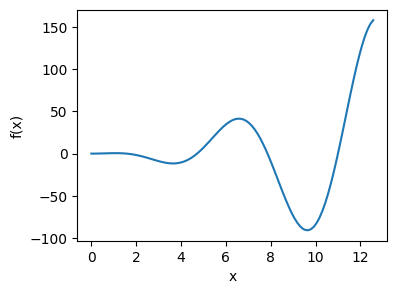

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = 4.0*np.pi
x = a + np.linspace(a,b,101)
f = x**2*np.cos(x)
plt.figure(figsize=(4,3))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,f)


The curve oscillates and gets steeper as $x$ increases. In addition, the functiopn value does not vanish at the upper integral limit.  The rectangular rule is not suitabgle for this type of curve.  In the following example code, we evaluate integral using $N=2^{k+2},\, k=0, \cdots (k_\text{max}-1)$.  The step size is given by $h=4\pi/N$.  We plot the integral and absolute error as a function of $h$.

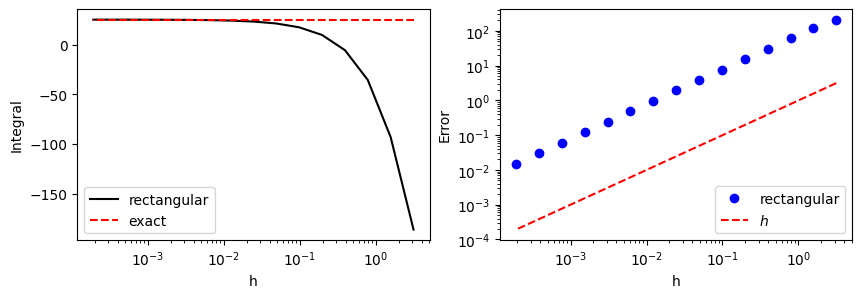

In [2]:
# Integration of x^2 cos(x) by the rectangular rule.

import numpy as np
import matplotlib.pyplot as plt

# Set the lower and upper bound of the integration.
a=0.
b=4.0*np.pi

# exact value is known.
exact = 8.0*np.pi

# the number of evaluation points 
kmax=15

# allocate arrays
h=np.zeros(kmax)
integral=np.zeros(kmax)
error=np.zeros(kmax)

# loop over different step size
for k in range(0,kmax):
    
    # set the number of steps
    N=2**(k+2)
    
    # set the step size
    h[k]=(b-a)/N

    # the locations where the function is evaluated.
    x = a + np.linspace(a,b,N+1)
    
    # function values
    f = x**2*np.cos(x)

    # rectangluar rule
    integral[k]=f[0:N].sum()*h[k]
    
    # absolute error
    error[k]=abs(integral[k]-exact)

    # reset x and f for next cycle
    del x
    del f
    
# Plot data
plt.ioff()
plt.figure(figsize=(10,3))

# plot of the integral
plt.subplot(1,2,1)
plt.semilogx(h,integral,"-k",label="rectangular")
plt.semilogx([h[0],h[kmax-1]],[exact,exact],"--r",label="exact")
plt.legend(loc=0)
plt.xlabel("h")
plt.ylabel("Integral")

# plot of the absolute error
plt.subplot(1,2,2)
plt.loglog(h,error, "ob", label="rectangular")
plt.loglog(h,h,"--r",label='$h$')
plt.legend(loc=4)
plt.xlabel("h")
plt.ylabel("Error")
plt.show()

From naked eyes (left panel), the integral looks converging well below $h=10^{-2}$.  However, the actual error (right panel) shows that the error is still significant.  The error is propotional to $h$ as the theory predicts. 

## Trapezoidal rule

Istead of approximating with piecewise constant lines, fitting each segment of the curve with a linear function.  For $x \in [x_n, x_{n+1}]$, we approximate function $f(x)$ with a linear equation $a x + b$ such that $f(x_n)= a x_n + b$ and $f(x_{n+1}) = a x_{n+1}+b$.  Then, the area below the linear line, which is a trapezoid, approximates the integral of the segment.  See Fig. {numref}`fig_int_trapezoid`  Hence,

$$
\int_{x_n}^{x_{n+1}} f(x) dx \approx \frac{h}{2}[f(x_n)+f(x_{n+1})]\,.
$$

Adding all segments, we obtain the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule)

$$
\int_{a}^{b} f(x) dx \approx \sum_{n=0}^{N-1} \frac{h}{2}[f(x_n)+f(x_{n+1})] = \frac{h}{2} [f(a) + f(b)] + h \sum_{n=1}^{N-1} f(x_n)
$$(eq_int_trapezoid)

Notice that this formula is equivalen to the average of the forward and backward rectangular methods.   Note also that the difference between the trapezoidal rule and the rectangular rule is only how the end points $f(a)$ and $f(b)$ are treated.  

```{figure} int_trapezoid.png
:name: fig_int_trapezoid
The trapezoidal rule is illustrated.  The integral is approximated by the shadowed area of all trapezoids shown in the diagrams.
```

Let us find the order of error by substituting the forward finite difference method, $f'(x_n) = \displaystyle\frac{f(x_n+h)-f(x_n)}{h}+\mathcal{O}(h)$ into Eq. {eq}`eq_int_expand1`:

$$
\int_{x_n}^{x_{n+1}} f(x) dx = f(x_n) h + f'(x_n)\frac{h^2}{2} + \mathcal{O}(h^3) = \frac{f(x_n)+f(x_{i+n})}{2} h + \mathcal{O}(h^3)\,.
$$(eq_error_trapezoid)

If $h^3$ and higher orders is ignored, we obtain the trapezoid rule.  Hence, the trapezoidal rule is locally accurate up to $h^2$, better than the rectangular rule.  The total error is the order of $h^3 N =(b-a) h^2$.  The trapezoidal method is commonly used due to its simplicity and reasonable accuracy. Interestingly, if the function vanishes at the integral limits, $f(a)=f(b)=0$, then the rectangular rule produces exactly the same result as the trapezoidal rule. 

```{admonition} Alrgorithm 3.1.2:  Trapezoidal rule

1. Choose an appropriate N (often through try and error).
2. Get the step length: $h=\displaystyle\frac{b-a}{N}$
3. Generate evaluation points $x_n = a + n h,\, n=0,\cdots N$.
4. Evaluate function values:  $f_n = f(x_n)$
5. Add up all $f_n$. 
6. Apply the boundary correction, that is subtract $f(x_0)+f(x_n)$. 
7. Multiply $h$,
```

---

**Example 3.1.2**  

We solve the same integral as Example 3.1.1 using the trapezoidal rule.  The oscillation function suggests that the curve gets steep between the tops and the bottoms.  The trapezoidal rule takes into account the slope.  The major soure of error is the big curvature at the tops and the bottoms.

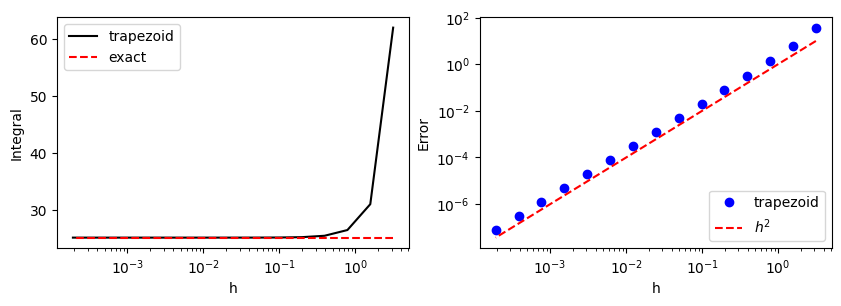

In [3]:
# Integration of x^2 cos(x) by the rectangular rule.

import numpy as np
import matplotlib.pyplot as plt

# Set the lower and upper bound of the integration.
a=0.
b=4.0*np.pi

# exact value is known.
exact = 8.0*np.pi

# the number of evaluation points 
kmax=15

# allocate arrays
h=np.zeros(kmax)
integral=np.zeros(kmax)
error=np.zeros(kmax)

# loop over different step size
for k in range(0,kmax):
    
    # set the number of steps
    N=2**(k+2)
    
    # set the step size
    h[k]=(b-a)/N

    # the locations where the function is evaluated.
    x = a + np.linspace(a,b,N+1)
    
    # function values
    f = x**2*np.cos(x)

    # trapezoidal rule
    integral[k]=f.sum()*h[k]-(f[0]+f[N])*h[k]/2.
    
    # absolute error
    error[k]=abs(integral[k]-exact)

    # reset x and f for next cycle
    del x
    del f
    
# Plot data
plt.ioff()
plt.figure(figsize=(10,3))

# plot of the integral
plt.subplot(1,2,1)
plt.semilogx(h,integral,"-k",label="trapezoid")
plt.semilogx([h[0],h[kmax-1]],[exact,exact],"--r",label="exact")
plt.legend(loc=0)
plt.xlabel("h")
plt.ylabel("Integral")

# plot of the absolute error
plt.subplot(1,2,2)
plt.loglog(h,error, "ob", label="trapezoid")
plt.loglog(h,h**2,"--r",label='$h^2$')
plt.legend(loc=4)
plt.xlabel("h")
plt.ylabel("Error")
plt.show()

The integral seems converging faster than the rectangular rule in Example 3.1.1. The absolute error also shows that indeed the error decreasing much faster.  The arror is in propotion to $h^2$ as expected from the theory.

## Simpson's rule

The rectangular method takes into account opnly the first term in the expansion {eq}`eq_int_expand1` and ignores the first order derivative $f'(x)$.  The trapezoidal method includes the derivative information but ignores the second order derivative $f''(x)$.  On other words, it take into account the slope of the curve but not the curvature  Natural extension to this line of approximation is to take into account the curvature or $f''(x)$.  Recall that the evaluation of $f''(x)$ requires at least three data points (See Sec {numref}`sec-diff-second`.)  Hence, we consider another interval $[x_{n-1},x_n]$:

$$
\int_{x_{n}}^{x_{n}-h} f(x) dx = -f(x_n) h + f'(x_n) \frac{h^2}{2} - f''(x_n) \frac{h^3}{3!} + +f^{(3)}(x_n) \frac{h^4}{4!} + \mathcal{O}(h^5)
$$(eq_int_expand2)

By adding Eqs. {eq}`eq_int_expand1` and {eq}`eq_int_expand2`, we find an approximated integral as

$$
\int_{x_{n-1}}^{x_{n+1}} f(x) dx = 2 f'(x_n) h + 2 f''(x_n) \frac{h^3}{3!} + \mathcal{O}(h^5)
$$(eq_int_expand3)

Note that the fourth order term is canceled out, which makes this approximation accurate.

Substituting the finite difference formula of the second order derivative Eq. {eq}`eq_diff2_s3` into Eq. {eq}`eq_int_expand3`, we find the integral 

$$
\int_{x_{n-1}}^{x_{n+1}} f(x) dx = \left [ \frac{1}{3} f(x_{n-1})+ \frac{4}{3} f(x_n) + \frac{1}{3} f(x_{n+1}) \right ] h + \mathcal{O}(h^5),
$$

which leads to local error at the order of $h^5$.
Repeating this formular, we obtain the [Simpson rule](https://en.wikipedia.org/wiki/Simpson%27s_rule)

$$
\int_{a}^{b} f(x) dx = \sum_{j=0}^{N/2-1} \left [ f(x_{2j})+4 f(x_{2j+1})+f(x_{2j+2}) \right ] \frac{h}{3} + \mathcal{O}(h^4)
$$

The error of the Simpson's rule is the order of $h^5$ per segment and thus $h^4$ for the whole integral which is two orders of magnitude better than that of the trapezoidal rule.

```{admonition} Alrgorithm 3.1.3:  Simpson's rule

1. Set the number of evaluation points $N$ which should be a even integer. 
2. Set the step length: $h=\displaystyle\frac{b-a}{N}$
3. Set $s=-f(a)-f(b)$ where $s$ should be double (float64).
4. Repeat steps 4-6 for $j=0$ to $j=N/2-1$:
5. $x=a+2*j*h$.
6. $s=s+2.0*f(x)+4.0*f(x+h)$. 
7. Go back to step 4 and repeat with new $j$.
8. The integral is given by $s*h/3.0$.
```

---

**Example 3.1.3**  

We solve the same integral as Example 3.1.1 using the Simplson's rule.   The slope and the curvature are both taken care of by the Simpson's rule.  Hence, we expect a very good result.

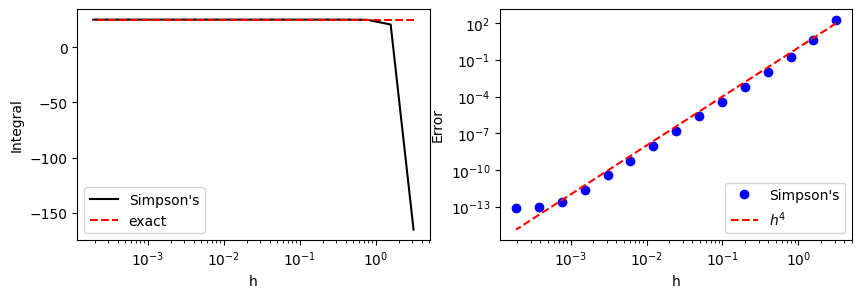

In [4]:
# Integration of x^2 cos(x) by the Simpson's rule.

import numpy as np
import matplotlib.pyplot as plt

# Set the lower and upper bound of the integration.
a=0.
b=4.0*np.pi

# exact value is known.
exact = 8.0*np.pi

# the number of evaluation points 
kmax=15

# allocate arrays
h=np.zeros(kmax)
integral=np.zeros(kmax)
error=np.zeros(kmax)

# loop over different step size
for k in range(0,kmax):
    
    # set the number of steps
    N=2**(k+2)
    
    # set the step size
    h[k]=(b-a)/N

    # the locations where the function is evaluated.
    x = a + np.linspace(a,b,N+1)
    
    # function values
    f = x**2*np.cos(x)

    # trapezoidal rule
    integral[k]=(2.0*f[0:N-1:2].sum()+4.0*f[1:N:2].sum()-f[0]+f[N])*h[k]/3.
    
    # absolute error
    error[k]=abs(integral[k]-exact)

    # reset x and f for next cycle
    del x
    del f
    
# Plot data
plt.ioff()
plt.figure(figsize=(10,3))

# plot of the integral
plt.subplot(1,2,1)
plt.semilogx(h,integral,"-k",label="Simpson's")
plt.semilogx([h[0],h[kmax-1]],[exact,exact],"--r",label="exact")
plt.legend(loc=0)
plt.xlabel("h")
plt.ylabel("Integral")

# plot of the absolute error
plt.subplot(1,2,2)
plt.loglog(h,error, "ob", label="Simpson's")
plt.loglog(h,h**4,"--r",label='$h^4$')
plt.legend(loc=4)
plt.xlabel("h")
plt.ylabel("Error")
plt.show()

The convergency is remarkably faster compared to the two previous methods.  The error is at the order of $h^4$ as theoretically estimated.  Note also that the round-off error is visible below $h=10^{-3}$.

## Canned routines

The trapezoidal and Simplson's rules are widely used in neumerical computations.  There are many preprogrmamed pacakges so that you don't have to write your own code.  Nothing is worng with using the canned routines.  However, we must know the limitation of the methods the routines use or otherwise your calculation may not be accurate.  

A python package [scipy](https://scipy.org) contains a large number of canned routines for scientific computation, including `trapzoid` (trapezoidal rule) and `simpson` (Simpson's rule).  The following example uses the `simpson` subroutine.



---

**Example 3.1.4**  

We solve the same integral as Example 3.1.1 using simpson  in scipy.  See [reference manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html#scipy.integrate.simpson).

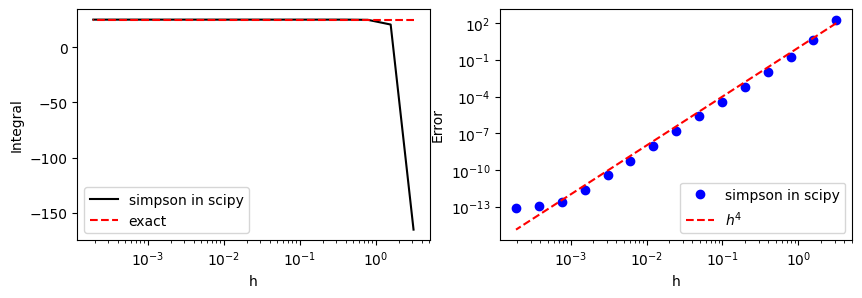

In [5]:
# Integration of x^2 cos(x) using the canned routines `simpson` in scipy.

import numpy as np
import matplotlib.pyplot as plt

# load the scipy integral package
import scipy.integrate as integrate

# Set the lower and upper bound of the integration.
a=0.
b=4.0*np.pi

# exact value is known.
exact = 8.0*np.pi

# the number of evaluation points 
kmax=15

# allocate arrays
h=np.zeros(kmax)
integral=np.zeros(kmax)
error=np.zeros(kmax)

# loop over different step size
for k in range(0,kmax):
    
    # set the number of steps
    N=2**(k+2)
    
    # set the step size
    h[k]=(b-a)/N

    # the locations where the function is evaluated.
    x = a + np.linspace(a,b,N+1)
    
    # function values
    f = x**2*np.cos(x)

    # Simpson subroutine from scipy.
    integral[k]=integrate.simpson(f,x=x)
    
    # absolute error
    error[k]=abs(integral[k]-exact)

    # reset x and f for next cycle
    del x
    del f
    
# Plot data
plt.ioff()
plt.figure(figsize=(10,3))

# plot of the integral
plt.subplot(1,2,1)
plt.semilogx(h,integral,"-k",label="simpson in scipy")
plt.semilogx([h[0],h[kmax-1]],[exact,exact],"--r",label="exact")
plt.legend(loc=0)
plt.xlabel("h")
plt.ylabel("Integral")

# plot of the absolute error
plt.subplot(1,2,2)
plt.loglog(h,error, "ob", label="simpson in scipy")
plt.loglog(h,h**4,"--r",label="$h^4$")
plt.legend(loc=4)
plt.xlabel("h")
plt.ylabel("Error")
plt.show()

The result is identical to that of Example 3.1.3.  

> *Exercise*:  Numerically evaluate $\int_0^{2 n \pi} e^{-x} \cos(x)\, dx$ where $n$ is integer.  The exact answer is $\frac{1}{2}\left(1-e^{-2 n \pi}\right)$.  Try $n=4$. At least 6 digits of the result should agree with the exact value.

## Clenshaw–Curtis quadrature

Simpson's method provides adequate accuracy for most of application.  There are even better methods, for example, [Clenshaw–Curtis quadrature](https://en.wikipedia.org/wiki/Clenshaw%E2%80%93Curtis_quadrature).  The algorithm is a bit more complicated.  The idea is to convert the original integral to another form of integral suitable for neumarical integration by variable transformations and the Fourier cosine expansion. See [Wikipedia page](https://en.wikipedia.org/wiki/Clenshaw%E2%80%93Curtis_quadrature) for details.

Scipy provides a canned routine `quad` which uses the Clenshaw–Curtis quadrature.  You can compute $\int_a^b f(x) dx$ by just calling `quad(f(x),a,b)`.  You dont have to specify the stempsize $h$ nor the number of steps $N$.  It is automatically It returns the integral value and the absolute error in a tuple.  
In most cases, the error is close to the round-off limit.  See the following example. 

---

**Example 3.1.4**  We solve the same integral as Example 3.1.1 using quad in scipy.

In [6]:
import numpy as np
import scipy.integrate as integrate

y=integrate.quad(lambda x: x**2*np.cos(x),0.0,4.0*np.pi)

print("scipy quad:", y[0])
print("     exact:",8*np.pi)
print("abs. error:",y[1])

scipy quad: 25.13274122871832
     exact: 25.132741228718345
abs. error: 4.7354927655701164e-12


Notice that the agreement with the exact value is 15 digits, which is the best we can do with the double precision.

---

Last modified on 2/21/2024 by R. Kawai